In [ ]:
#STEP-1: Import Libraries
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
## IMPORT CSV FILES FROM DRIVE INTO GOOGLE-COLAB
downloaded = drive.CreateFile({'id':'1ORTNkZgo6uc5VSYopHxl787fPdrs7-LT'}) # replace the id with id of file you want to access
downloaded.GetContentFile('SLR-Data.csv')
#https://drive.google.com/file/d/1ORTNkZgo6uc5VSYopHxl787fPdrs7-LT/view?usp=sharing

(8, 2)
   No of Hours Spent During(X)  Risk Score on a scale of 0-100(Y)
0                           10                                 95
1                            9                                 80
2                            2                                 10
3                           15                                 50
4                           10                                 45
Slope,Intercept: 4.58789860997547 12.584627964022893


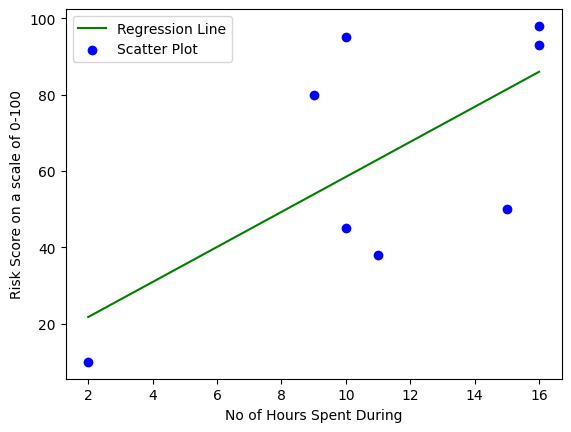

Root Mean Squares Error: 22.759716640449565
Accuracy: 43.709481451010035
Enter No Hours Spent in Driving:9


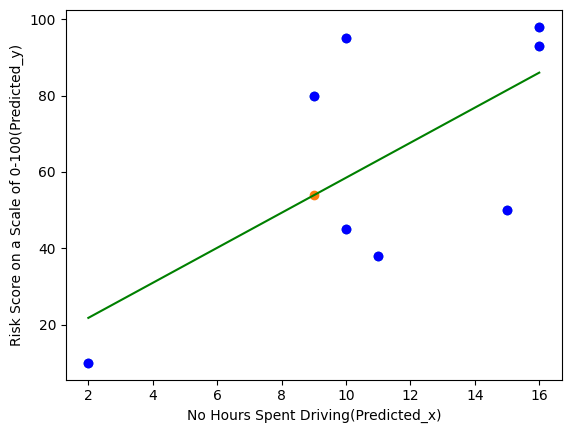

In [ ]:
#installation of python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = pd.read_csv('SLR-Data.csv')
print(data.shape)
print(data.head())
#print(data.describe())

# Collecting X and Y
X = data['No of Hours Spent During(X)'].values
Y = data['Risk Score on a scale of 0-100(Y)'].values

# Calculate Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
#print(mean_x)
#print(mean_y)
# Total number of values
m = len(X)
# Using the formula to calculate b1(slope) and b0(intercept)
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients:b1,b0
print("Slope,Intercept:",b1,b0)

# Plotting Values and Regression Line
max_x = np.max(X)
min_x = np.min(X)

# Calculating line values x and y
x = np.linspace(min_x, max_x)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='green', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.xlabel('No of Hours Spent During')
plt.ylabel('Risk Score on a scale of 0-100')
plt.legend()
plt.show()

#For  Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print("Root Mean Squares Error:",rmse)
# Calculating Accuracy Score
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print("Accuracy:",r2*100)
#predicting a o/p (y) for new value of x
predict_x=int(input('Enter No Hours Spent in Driving:'))
predict_y=(4.58789861*predict_x)+12.584627964022907
plt.scatter(X,Y)
plt.scatter(predict_x,predict_y)
plt.xlabel('No Hours Spent Driving(Predicted_x)')
plt.ylabel('Risk Score on a Scale of 0-100(Predicted_y)')
 #plotting the regression line
plt.scatter(X, Y, c='blue')
plt.plot(x, y, color='green')
# function to show plot
plt.show()

**ASSIGNMENT 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])
df.head()
#downloaded = drive.CreateFile({'id':'12BY34aCbYLoLjy3gDUMrZEBUf7l5FZsd'}) # replace the id with id of file you want to access
#downloaded.GetContentFile('iris.csv')
#dataset=pd.read_csv("iris.csv")
#dataset
#https://drive.google.com/file/d/12BY34aCbYLoLjy3gDUMrZEBUf7l5FZsd/view?usp=share_link

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values


In [ ]:
y = df.loc[:,['target']].values


In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
#PCA Projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


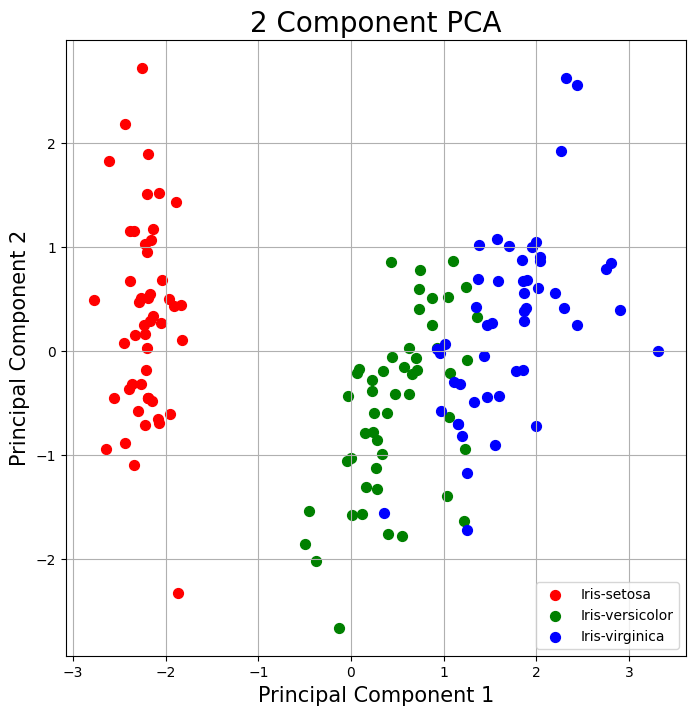

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Explained Variance:The explained variance tells us how much information (variance)
#can be attributed to each of the principal components.
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

**ASSIGNMENT 3**

In [ ]:
downloaded = drive.CreateFile({'id':'1jql2mwV15BCFeX52G1PGSCr8Y4jLdn8f'}) # replace the id with id of file you want to access
downloaded.GetContentFile('DT-Data.csv')


    id  age  income  gender  marital_status
0    0    1       0       1               1
1    1    1       0       1               0
2    2    0       0       1               1
3    3    2       2       1               1
4    4    2       1       0               1
5    5    2       1       0               0
6    6    0       1       0               0
7    7    1       2       1               1
8    8    1       1       0               0
9    9    2       2       0               1
10  10    1       2       0               0
11  11    0       2       1               0
12  12    0       0       0               1
13  13    2       2       1               0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Prediction: ['Yes']


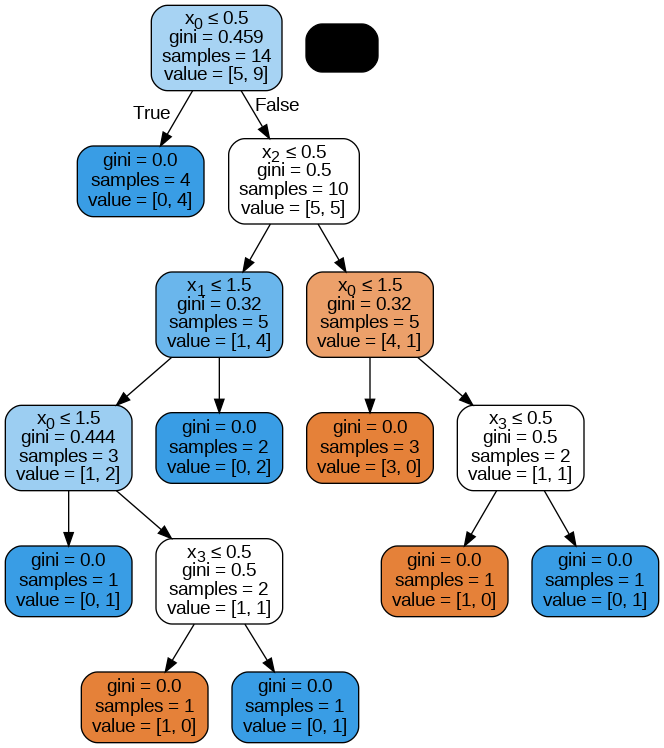

In [ ]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading Dataset
dataset=pd.read_csv("DT-Data.csv")
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,5].values

#Perform Label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

X = X.apply(LabelEncoder().fit_transform)
print (X)

from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier()
regressor.fit(X.iloc[:,1:5],y)

#Predict value for the given expression
X_in=np.array([0,1,0,1])

y_pred=regressor.predict([X_in])
print ("Prediction:", y_pred)

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
# Create DOT data
dot_data = StringIO()

export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Decision_Tree.png')
# Show graph
Image(graph.create_png())

**Assignment 4**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [ ]:
#from sklearn.datasets import load_iris
#dataset = load_iris()
#dataset
downloaded = drive.CreateFile({'id':'12BY34aCbYLoLjy3gDUMrZEBUf7l5FZsd'}) # replace the id with id of file you want to access
downloaded.GetContentFile('iris.csv')
dataset=pd.read_csv("iris.csv")
dataset
#https://drive.google.com/file/d/12BY34aCbYLoLjy3gDUMrZEBUf7l5FZsd/view?usp=share_link
#from sklearn.datasets import load_iris
#dataset = load_iris()
#dataset
downloaded = drive.CreateFile({'id':'12BY34aCbYLoLjy3gDUMrZEBUf7l5FZsd'}) # replace the id with id of file you want to access
downloaded.GetContentFile('iris.csv')
dataset=pd.read_csv("iris.csv")
dataset
#https://drive.google.com/file/d/12BY34aCbYLoLjy3gDUMrZEBUf7l5FZsd/view?usp=share_link

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['variety'].values

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [ ]:
# Feature Scaling to bring the variable in a single scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [ ]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


**ASSIGNMENT 5**

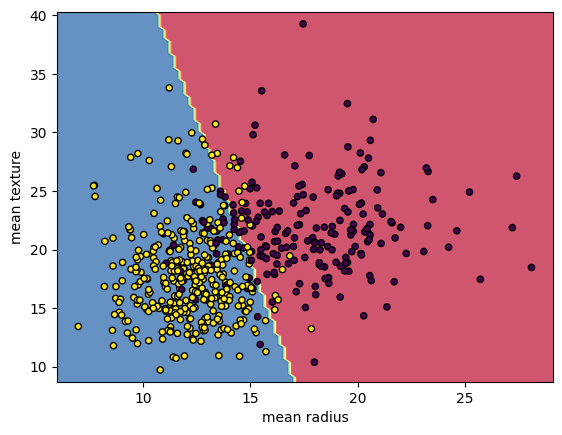

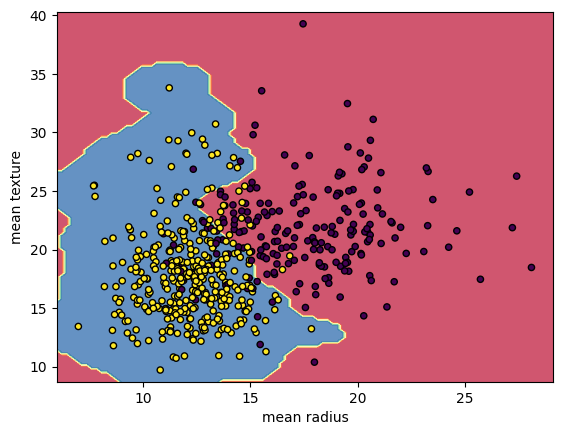

In [ ]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target
#Build the model
svm = SVC(kernel="linear")
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
		svm,
		X,
		response_method="predict",
		cmap=plt.cm.Spectral,
		alpha=0.8,
		xlabel=cancer.feature_names[0],
		ylabel=cancer.feature_names[1],
	)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
			c=y,
			s=20, edgecolors="k")
plt.show()


#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
		svm,
		X,
		response_method="predict",
		cmap=plt.cm.Spectral,
		alpha=0.8,
		xlabel=cancer.feature_names[0],
		ylabel=cancer.feature_names[1],
	)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
			c=y,
			s=20, edgecolors="k")
plt.show()




**Assignment 6**

[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.2  0.3 ]
 [0.25 0.5 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]


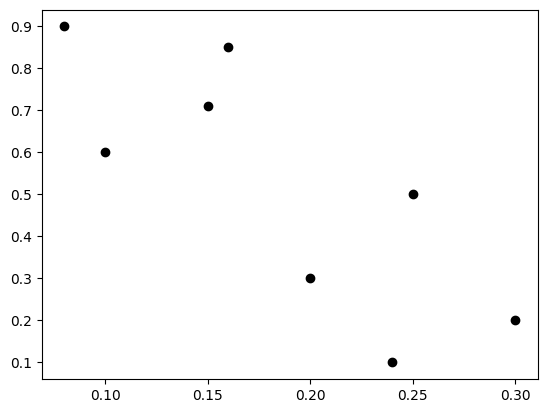

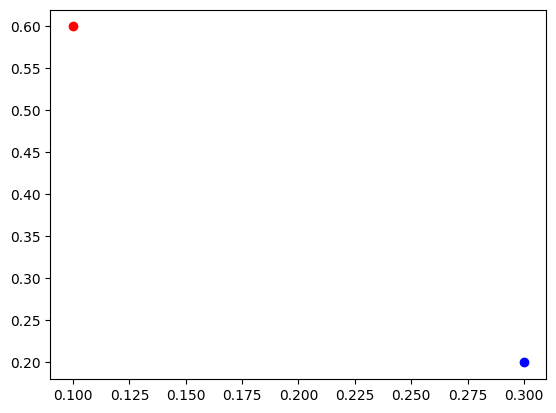

[[0.1 0.3]
 [0.6 0.2]]
point No.6[0.25,0.5] is belongs to blue cluster(cluster no:2)


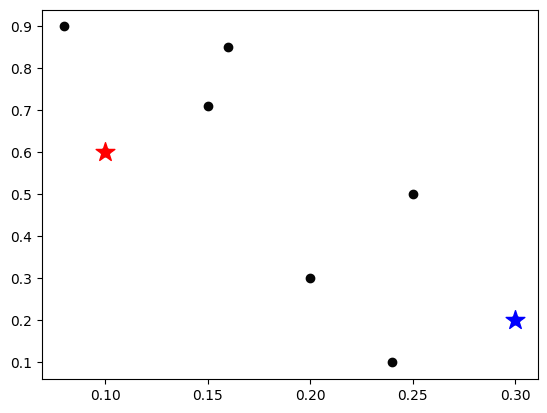

[1 1 1 1 0 0 0 0]
No of population around cluster 2: 3
Previous value of m1 and m2 is:
M1== [0.1 0.3]
M1== [0.6 0.2]
Updated value of m1 and m2 is:
M1== [0.2475 0.275 ]
M1== [0.1225 0.765 ]


In [ ]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#create dataset using DataFrame
df=pd.DataFrame({'X':[0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3],
                 'y':[0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2]})
f1 = df['X'].values
f2 = df['y'].values
X = np.array(list(zip(f1, f2)))
print(X)

#centroid points
C_x=np.array([0.1,0.3])
C_y=np.array([0.6,0.2])
centroids=C_x,C_y

#plot the given points
colmap = {1: 'r', 2: 'b'}
plt.scatter(f1, f2, color='k')
plt.show()

#for i in centroids():
plt.scatter(C_x[0],C_y[0], color=colmap[1])
plt.scatter(C_x[1],C_y[1], color=colmap[2])
plt.show()

C = np.array(list((C_x, C_y)), dtype=np.float32)
print (C)

#plot given elements with centroid elements
plt.scatter(f1, f2, c='#050505')
print("point No.6[0.25,0.5] is belongs to blue cluster(cluster no:2)")
plt.scatter(C_x[0], C_y[0], marker='*', s=200, c='r')
plt.scatter(C_x[1], C_y[1], marker='*', s=200, c='b')
plt.show()


#import KMeans class and create object of it
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2,random_state=0)
model.fit(X)
labels=model.labels_
print(labels)

#using labels find population around centroid
count=0
for i in range(len(labels)):
    if (labels[i]==1):
        count=count+1

print('No of population around cluster 2:',count-1)

#Find new centroids
new_centroids = model.cluster_centers_

print('Previous value of m1 and m2 is:')
print('M1==',centroids[0])
print('M1==',centroids[1])

print('Updated value of m1 and m2 is:')
print('M1==',new_centroids[0])
print('M1==',new_centroids[1])





**Assignment 7**

In [ ]:
# Import all relevant libraries

from sklearn.ensemble import GradientBoostingClassifier

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing

import warnings

warnings.filterwarnings("ignore")

#STEP-1: Import Libraries
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1zI-X3zdiuM9u74zQyKIShvAUtPJQ7jUK'}) # replace the id with id of file you want to access
downloaded.GetContentFile('income_evaluation.csv')
# https://drive.google.com/file/d/1zI-X3zdiuM9u74zQyKIShvAUtPJQ7jUK/view?usp=sharing  (Dataset Downloads Link)
#Now let’s read the dataset and look at the columns to understand the information better.
#https://drive.google.com/file/d/1zI-X3zdiuM9u74zQyKIShvAUtPJQ7jUK/view?usp=sharing
df = pd.read_csv('income_evaluation.csv')
df.head()

df.shape
df.info()

df.isnull().sum()
df.columns

#df.drop(columns=' fnlwgt',inplace=True)
df.columns

X = df.drop(columns=' income')
y = df[' income']

from sklearn.preprocessing import LabelEncoder
def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])

df.columns

label_list = [' workclass', ' education',' marital-status',
       ' occupation', ' relationship', ' race', ' sex',' native-country', ' income']
for i in label_list:
    label_encoder(i)
df.head()

from sklearn.model_selection import train_test_split

X = df.drop([' income'],axis=1).values   # independant features
y = df[' income'].values					# dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("X_train shape:",X_train.shape)
print("y_test shape:",y_test.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)

#Buildimg Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gradient_booster.score(X_test,y_test))

result_dict_train = {}
result_dict_test = {}
result_dict_train["Gradient-Boost Default Train Score"] = np.mean(accuracies)
result_dict_test["Gradient-Boost Default Test Score"] = gradient_booster.score(X_test,y_test)

grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

result_dict_train
result_dict_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
X_train shape: (26048, 14)
y_test shape: (6513,)
X_test shape: (6513, 14)
y_

{'Gradient-Boost Default Test Score': 0.8708736373407032}

**Assignment on KNN**

In [ ]:
downloaded = drive.CreateFile({'id':'1oikTU46hEkvGW_DeFyWos5_6q3cX6h7B'}) # replace the id with id of file you want to access
downloaded.GetContentFile('knndata.csv')
#Importing Libraries

import numpy as np
import pandas as pd

# To split dataset into its attributes and labels.

dataset=pd.read_csv("knndata.csv")
X=dataset.iloc[:,:-1].values
print(X)
Y=dataset.iloc[:,2].values
print(Y)

# Training of KNN Classification Model using trained data

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X,Y)

# Testing  KNN Classification Model using unseen test data

X_test=np.array([6,6])
y_pred = classifier.predict([X_test])
print ('The predicition of classifier is :', y_pred)
classifier = KNeighborsClassifier(n_neighbors=3,weights='distance')
classifier.fit(X,Y)
# predict the class for points(6,6)
X_test=np.array([6,6])
y_pred = classifier.predict([X_test])
print ('The predicition of classifier is :', y_pred)


[[2 4]
 [4 6]
 [4 4]
 [4 2]
 [6 4]
 [6 2]]
['negative' 'negative' 'postive' 'negative' 'negative' 'positive']
The predicition of classifier is : ['negative']
The predicition of classifier is : ['negative']


**Home Assignment based on Assignment 1**

   height  weight
0     151      63
1     174      81
2     138      56
3     186      91
4     128      47
   height  weight
0     151      63
1     174      81
2     138      56
3     186      91
4     128      47
5     136      57
6     179      76
7     163      72
8     152      62
9     131      48
[[151]
 [174]
 [138]
 [186]
 [128]
 [136]
 [179]
 [163]
 [152]
 [131]]
[63 81 56 91 47 57 76 72 62 48]
y= [0.67461045]X + -38.45508707607701
Accuracy: 95.47822477500306


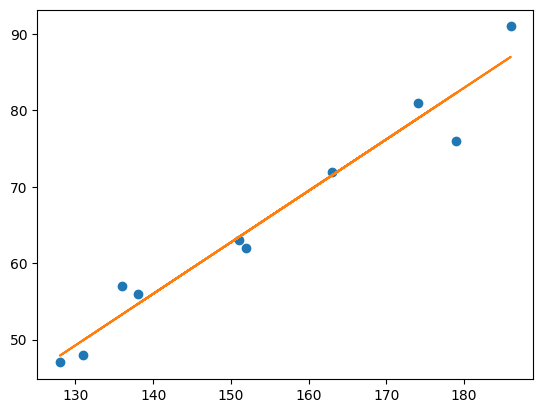

Enter Height:10


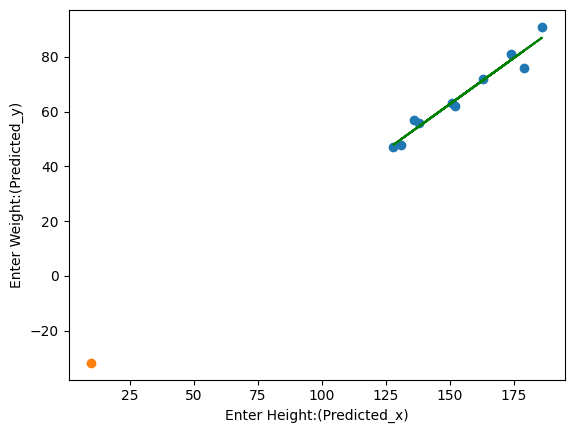

In [ ]:
#Home Assignment Height & Weight Problem

downloaded = drive.CreateFile({'id':'1e10Ynfgrc35FtMl2V5qpzTGyuWF4KQsZ'}) # replace the id with id of file you want to access
downloaded.GetContentFile('hw.csv')
#Read file Height & Weight csv as panda dataframe
import pandas as pd
xyz = pd.read_csv('hw.csv')
print(xyz.head(5))
#Running Height & Weight Program(SLR)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load dataset
dataset=pd.read_csv("hw.csv")
# To display dataset
print(dataset)
x=dataset.iloc[:,:-1].values
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values
print(X)
print(y)
#from sklearn subpackage import linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)
#To get the slop
regressor.coef_
#To get the y intercept
regressor.intercept_
#To print the equation of line
print("y= "+ str(regressor.coef_) + "X + " + str(regressor.intercept_))

#To get the slop
print("Accuracy:",regressor.score(X,y)*100)
#To plot graph
plt.plot(X,y,'o')
plt.plot(X,regressor.predict(X));
plt.show()
predict_x=int(input('Enter Height:'))
predict_y=(0.67461045*predict_x)-38.45508707607698
plt.scatter(X,y)
plt.scatter(predict_x,predict_y)
plt.xlabel('Enter Height:(Predicted_x)')
plt.ylabel('Enter Weight:(Predicted_y)')
#plotting the Predicted regression line
plt.plot(X,regressor.predict(X),color='green');
plt.show()

